In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cmi-detect-behavior-with-sensor-data/train_demographics.csv
/kaggle/input/cmi-detect-behavior-with-sensor-data/test_demographics.csv
/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv
/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/cmi_inference_server.py
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/cmi_gateway.py
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/__init__.py
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/core/templates.py
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/core/base_gateway.py
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/core/relay.py
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/core/kaggle_evaluation.proto
/kaggle/input/cmi-detect-behavior-with-sensor-data/kaggle_evaluation/core/__init__.py
/kaggle/input/cmi-detect-behav

# **Data Visualization**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [3]:
# Load the datasets
train_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv")
train_dem_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/train_demographics.csv")
test_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv")
test_dem_df = pd.read_csv("/kaggle/input/cmi-detect-behavior-with-sensor-data/test_demographics.csv")

In [4]:
train_df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,62.0,65.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,71.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,71.0,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,80.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,72.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [5]:
test_df

,row_id,sequence_id,sequence_counter,subject,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000001_000000,SEQ_000001,0,SUBJ_055840,9.039062,5.261719,0.800781,0.367188,-0.397400,-0.629028,...,97.0,87.0,206.0,-1.0,195.0,-1.0,-1.0,-1.0,111.0,-1.0
1,SEQ_000001_000001,SEQ_000001,1,SUBJ_055840,9.421875,3.460938,-1.113281,0.353882,-0.507141,-0.652710,...,175.0,158.0,-1.0,-1.0,-1.0,-1.0,-1.0,211.0,187.0,178.0
2,SEQ_000001_000002,SEQ_000001,2,SUBJ_055840,10.160156,2.082031,-3.871094,0.384094,-0.532104,-0.639648,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,177.0
3,SEQ_000001_000003,SEQ_000001,3,SUBJ_055840,9.773438,1.355469,-4.371094,0.387756,-0.531982,-0.634033,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,183.0
4,SEQ_000001_000004,SEQ_000001,4,SUBJ_055840,9.195312,1.011719,-3.222656,0.382751,-0.534180,-0.638367,...,-1.0,163.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,200.0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,SEQ_000011_000046,SEQ_000011,46,SUBJ_016452,-4.062500,8.613281,-3.140625,0.362488,0.176758,0.793274,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
103,SEQ_000011_000047,SEQ_000011,47,SUBJ_016452,-4.140625,8.535156,-3.410156,0.340637,0.166565,0.799927,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
104,SEQ_000011_000048,SEQ_000011,48,SUBJ_016452,-4.214844,8.414062,-3.371094,0.341675,0.169312,0.799316,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
105,SEQ_000011_000049,SEQ_000011,49,SUBJ_016452,-4.406250,8.957031,-3.292969,0.241699,0.135437,0.827820,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [6]:
datasets = {
    "Train Data": train_df,
    "Train Demographics": train_dem_df,
    "Test Data": test_df,
    "Test Demographics": test_dem_df,
}

# Print shapes
for name, df in datasets.items():
    num_rows, num_cols = df.shape
    print(f"{name}:")
    print(f"  Number of Rows: {num_rows}")
    print(f"  Number of Columns: {num_cols}\n")


Train Data:
  Number of Rows: 574945
  Number of Columns: 341

Train Demographics:
  Number of Rows: 81
  Number of Columns: 8

Test Data:
  Number of Rows: 107
  Number of Columns: 336

Test Demographics:
  Number of Rows: 2
  Number of Columns: 8



In [7]:
# Count duplicate rows in train_df
train_duplicates = train_df.duplicated().sum()

# Count duplicate rows in test_df
test_duplicates = test_df.duplicated().sum()

# Count duplicate rows in train_dem_df (optional)
train_dem_duplicates = train_dem_df.duplicated().sum()

# Count duplicate rows in test_dem_df (optional)
test_dem_duplicates = test_dem_df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_df: {train_duplicates}")
print(f"Number of duplicate rows in test_df: {test_duplicates}")
print(f"Number of duplicate rows in train_dem_df: {train_dem_duplicates}")
print(f"Number of duplicate rows in test_dem_df: {test_dem_duplicates}")

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0
Number of duplicate rows in train_dem_df: 0
Number of duplicate rows in test_dem_df: 0


In [8]:
# Define excluded prefixes
excluded_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')

def filtered_describe(df, name):
    # Exclude sensor columns
    filtered_cols = [col for col in df.columns 
                     if not col.startswith(excluded_prefixes) and pd.api.types.is_numeric_dtype(df[col])]
    
    # Describe and style
    print(f'\n➡️ Description of numerical columns in {name}')
    return df[filtered_cols].describe().T.style.background_gradient(cmap='viridis')

# Run for each dataset
display(filtered_describe(train_df, "train_df"))
display(filtered_describe(test_df, "test_df"))
display(filtered_describe(train_dem_df, "train_dem_df"))
display(filtered_describe(test_dem_df, "test_dem_df"))


➡️ Description of numerical columns in train_df


,count,mean,std,min,25%,50%,75%,max
sequence_counter,574945.000000,43.645234,45.717673,0.000000,17.000000,35.000000,54.000000,699.000000



➡️ Description of numerical columns in test_df


,count,mean,std,min,25%,50%,75%,max
sequence_counter,107.000000,26.308411,15.615311,0.000000,13.000000,26.000000,39.500000,55.000000



➡️ Description of numerical columns in train_dem_df


,count,mean,std,min,25%,50%,75%,max
adult_child,81.000000,0.518519,0.502770,0.000000,0.000000,1.000000,1.000000,1.000000
age,81.000000,21.814815,10.289693,10.000000,13.000000,22.000000,27.000000,53.000000
sex,81.000000,0.617284,0.489078,0.000000,0.000000,1.000000,1.000000,1.000000
handedness,81.000000,0.876543,0.331010,0.000000,1.000000,1.000000,1.000000,1.000000
height_cm,81.000000,167.993827,10.605863,135.000000,163.000000,170.000000,174.000000,190.500000
shoulder_to_wrist_cm,81.000000,51.580247,4.888415,41.000000,49.000000,52.000000,55.000000,71.000000
elbow_to_wrist_cm,81.000000,25.469136,3.025254,18.000000,24.000000,25.000000,27.000000,44.000000



➡️ Description of numerical columns in test_dem_df


,count,mean,std,min,25%,50%,75%,max
adult_child,2.000000,0.500000,0.707107,0.000000,0.250000,0.500000,0.750000,1.000000
age,2.000000,19.000000,8.485281,13.000000,16.000000,19.000000,22.000000,25.000000
sex,2.000000,0.500000,0.707107,0.000000,0.250000,0.500000,0.750000,1.000000
handedness,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
height_cm,2.000000,171.000000,8.485281,165.000000,168.000000,171.000000,174.000000,177.000000
shoulder_to_wrist_cm,2.000000,52.000000,0.000000,52.000000,52.000000,52.000000,52.000000,52.000000
elbow_to_wrist_cm,2.000000,25.000000,2.828427,23.000000,24.000000,25.000000,26.000000,27.000000


In [9]:
# Define prefixes to exclude
excluded_prefixes = ('acc_', 'rot_', 'thm_', 'tof_')
sensor_cols = [col for col in train_df.columns if not col.startswith(excluded_prefixes)]

# Sensor Data Summary for TRAIN
missing_sensor_train = pd.DataFrame({
    'Feature': sensor_cols,
    '[TRAIN] Missing Count': train_df[sensor_cols].isnull().sum().values,
    '[TRAIN] Missing %': (train_df[sensor_cols].isnull().sum().values / len(train_df)) * 100
})

unique_sensor_train = pd.DataFrame({
    'Feature': sensor_cols,
    'Unique Values [TRAIN]': train_df[sensor_cols].nunique().values
})

dtypes_sensor = pd.DataFrame({
    'Feature': sensor_cols,
    'Data Type': train_df[sensor_cols].dtypes.values
})

# Sensor Data Summary for TEST (only common features)
sensor_cols_test = [col for col in test_df.columns if col in sensor_cols]

missing_sensor_test = pd.DataFrame({
    'Feature': sensor_cols_test,
    '[TEST] Missing Count': test_df[sensor_cols_test].isnull().sum().values,
    '[TEST] Missing %': (test_df[sensor_cols_test].isnull().sum().values / len(test_df)) * 100
})

unique_sensor_test = pd.DataFrame({
    'Feature': sensor_cols_test,
    'Unique Values [TEST]': test_df[sensor_cols_test].nunique().values
})

# Merge all summaries
sensor_summary = missing_sensor_train.merge(missing_sensor_test, on='Feature', how='left')
sensor_summary = sensor_summary.merge(unique_sensor_train, on='Feature', how='left')
sensor_summary = sensor_summary.merge(unique_sensor_test, on='Feature', how='left')
sensor_summary = sensor_summary.merge(dtypes_sensor, on='Feature', how='left')

# Display styled DataFrame
# Fill or mask NaNs just for styling (does not affect data)
styled_df = sensor_summary.fillna(0)  # or .dropna(), if you prefer

# Apply background gradient safely
styled_df.style.background_gradient(cmap='viridis')

,Feature,[TRAIN] Missing Count,[TRAIN] Missing %,[TEST] Missing Count,[TEST] Missing %,Unique Values [TRAIN],Unique Values [TEST],Data Type
0,row_id,0,0.000000,0.000000,0.000000,574945,107.000000,object
1,sequence_type,0,0.000000,0.000000,0.000000,2,0.000000,object
2,sequence_id,0,0.000000,0.000000,0.000000,8151,2.000000,object
3,sequence_counter,0,0.000000,0.000000,0.000000,700,56.000000,int64
4,subject,0,0.000000,0.000000,0.000000,81,2.000000,object
5,orientation,0,0.000000,0.000000,0.000000,4,0.000000,object
6,behavior,0,0.000000,0.000000,0.000000,4,0.000000,object
7,phase,0,0.000000,0.000000,0.000000,2,0.000000,object
8,gesture,0,0.000000,0.000000,0.000000,18,0.000000,object


In [10]:
# Demographic columns (no exclusions)
dem_cols = train_dem_df.columns

# Missing values in train demographics
missing_demo_train = pd.DataFrame({
    'Feature': dem_cols,
    '[TRAIN DEMO] Missing Count': train_dem_df[dem_cols].isnull().sum().values,
    '[TRAIN DEMO] Missing %': (train_dem_df[dem_cols].isnull().sum().values / len(train_dem_df)) * 100
})

# Missing values in test demographics
missing_demo_test = pd.DataFrame({
    'Feature': dem_cols,
    '[TEST DEMO] Missing Count': test_dem_df[dem_cols].isnull().sum().values,
    '[TEST DEMO] Missing %': (test_dem_df[dem_cols].isnull().sum().values / len(test_dem_df)) * 100
})

# Unique value counts
unique_demo_train = pd.DataFrame({
    'Feature': dem_cols,
    'Unique Values [TRAIN DEMO]': train_dem_df[dem_cols].nunique().values
})

unique_demo_test = pd.DataFrame({
    'Feature': dem_cols,
    'Unique Values [TEST DEMO]': test_dem_df[dem_cols].nunique().values
})

# Data types
dtypes_demo = pd.DataFrame({
    'Feature': dem_cols,
    'Data Type': train_dem_df[dem_cols].dtypes.values
})

# Merge summaries
demo_summary = (
    missing_demo_train
    .merge(missing_demo_test, on='Feature', how='left')
    .merge(unique_demo_train, on='Feature', how='left')
    .merge(unique_demo_test, on='Feature', how='left')
    .merge(dtypes_demo, on='Feature', how='left')
)

# Display styled summary
demo_summary.style.background_gradient(cmap='viridis')

,Feature,[TRAIN DEMO] Missing Count,[TRAIN DEMO] Missing %,[TEST DEMO] Missing Count,[TEST DEMO] Missing %,Unique Values [TRAIN DEMO],Unique Values [TEST DEMO],Data Type
0,subject,0,0.000000,0,0.000000,81,2,object
1,adult_child,0,0.000000,0,0.000000,2,2,int64
2,age,0,0.000000,0,0.000000,28,2,int64
3,sex,0,0.000000,0,0.000000,2,2,int64
4,handedness,0,0.000000,0,0.000000,2,1,int64
5,height_cm,0,0.000000,0,0.000000,37,2,float64
6,shoulder_to_wrist_cm,0,0.000000,0,0.000000,21,1,int64
7,elbow_to_wrist_cm,0,0.000000,0,0.000000,12,2,float64


# **Pre Processing and Model Preparation**

In [11]:
import os
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import polars as pl
import kaggle_evaluation.cmi_inference_server

# Set global seed for reproducibility
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("Imports loaded")

2025-07-22 03:41:15.656131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753155675.839015      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753155675.891413      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Imports loaded


In [12]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv('/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv')
print(f"Loaded {len(df)} rows.")

Loading dataset...
Loaded 574945 rows.


In [13]:
label_encoder = LabelEncoder()
df['gesture'] = label_encoder.fit_transform(df['gesture'].astype(str))

# Save class names for inference
np.save('gesture_classes.npy', label_encoder.classes_)

# Print class label mapping
print("Gesture label mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"  {idx}: {label}")

Gesture label mapping:
  0: Above ear - pull hair
  1: Cheek - pinch skin
  2: Drink from bottle/cup
  3: Eyebrow - pull hair
  4: Eyelash - pull hair
  5: Feel around in tray and pull out an object
  6: Forehead - pull hairline
  7: Forehead - scratch
  8: Glasses on/off
  9: Neck - pinch skin
  10: Neck - scratch
  11: Pinch knee/leg skin
  12: Pull air toward your face
  13: Scratch knee/leg skin
  14: Text on phone
  15: Wave hello
  16: Write name in air
  17: Write name on leg


In [14]:
print("Checking for IMU-only sequences...")

def check_for_imu_only_seqs():
    # Identify thermopile and TOF columns
    thermal_tof_cols = [col for col in df.columns if col.startswith('thm_') or col.startswith('tof_')]
    
    # Group by sequence and check if all thm_/tof_ values are null
    imu_only_flags = df[thermal_tof_cols].isna().groupby(df['sequence_id']).all().all(axis=1)
    
    # Report statistics
    total_sequences = df['sequence_id'].nunique()
    imu_only_count = imu_only_flags.sum()
    imu_only_pct = (imu_only_count / total_sequences) * 100
    
    print(f"Total sequences: {total_sequences}")
    print(f"IMU-only sequences (all thm_/tof_ null): {imu_only_count} ({imu_only_pct:.1f}%)")

check_for_imu_only_seqs()

Checking for IMU-only sequences...
Total sequences: 8151
IMU-only sequences (all thm_/tof_ null): 96 (1.2%)


In [15]:
excluded_cols = {
    'gesture', 'sequence_type', 'behavior', 'orientation',  # train-only
    'row_id', 'subject', 'phase',  # metadata
    'sequence_id', 'sequence_counter'  # identifiers
}

# Setting this true makes model ignore thermal and tof data
drop_thermal_and_tof = True

if drop_thermal_and_tof:
    thermal_tof_cols = [col for col in df.columns if col.startswith('tof_')]
    excluded_cols.update(thermal_tof_cols)
    print(f"Ignoring {len(thermal_tof_cols)} thermopile / time-of-flight columns.")

# Select numeric feature columns
feature_cols = [col for col in df.columns if col not in excluded_cols]
print(f"Using {len(feature_cols)} numeric feature columns for training:")
print(feature_cols)

Ignoring 320 thermopile / time-of-flight columns.
Using 12 numeric feature columns for training:
['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']


In [16]:
# Check for NaNs in selected feature columns
nan_counts = df[feature_cols].isna().sum()
total_nans = nan_counts.sum()
print(f"\nTotal missing values in feature columns: {total_nans}")
if total_nans > 0:
    print("Columns with missing values:")
    print(nan_counts[nan_counts > 0])
else:
    print("No missing values found in feature columns.")


Total missing values in feature columns: 75375
Columns with missing values:
rot_w     3692
rot_x     3692
rot_y     3692
rot_z     3692
thm_1     6987
thm_2     7638
thm_3     6472
thm_4     6224
thm_5    33286
dtype: int64


In [17]:
def preprocess_sequence(df_sequence: pd.DataFrame, feature_cols: list) -> np.ndarray:
    data = df_sequence[feature_cols].copy()
    data = data.ffill().bfill().fillna(0)
    scaled = StandardScaler().fit_transform(data)
    return scaled

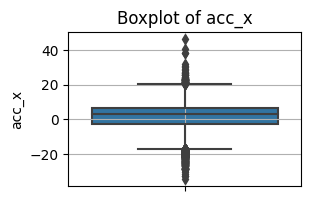

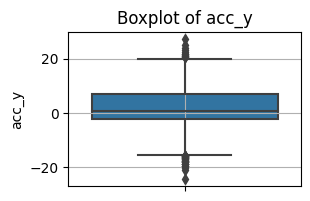

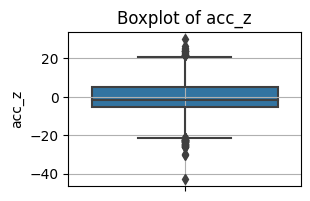

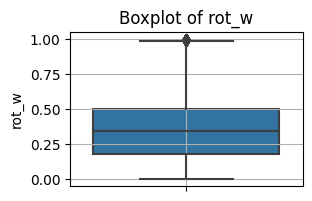

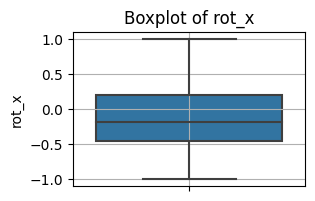

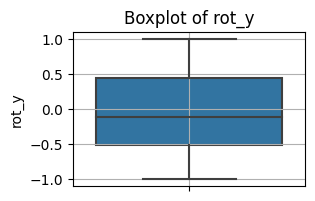

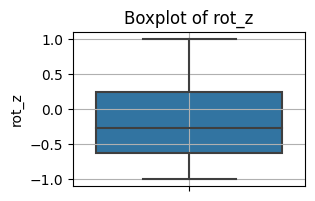

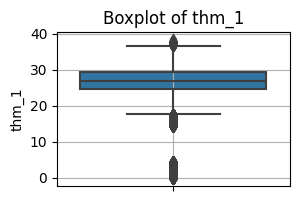

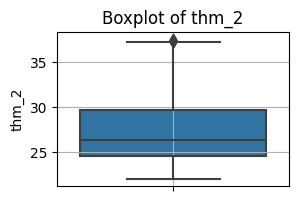

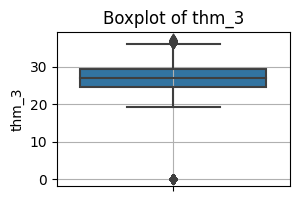

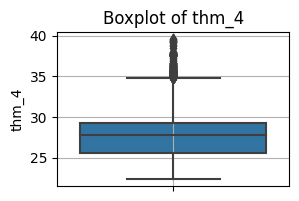

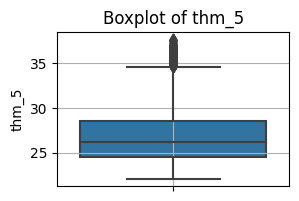

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

imu_columns = ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

for col in imu_columns:
    plt.figure(figsize=(3, 2))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

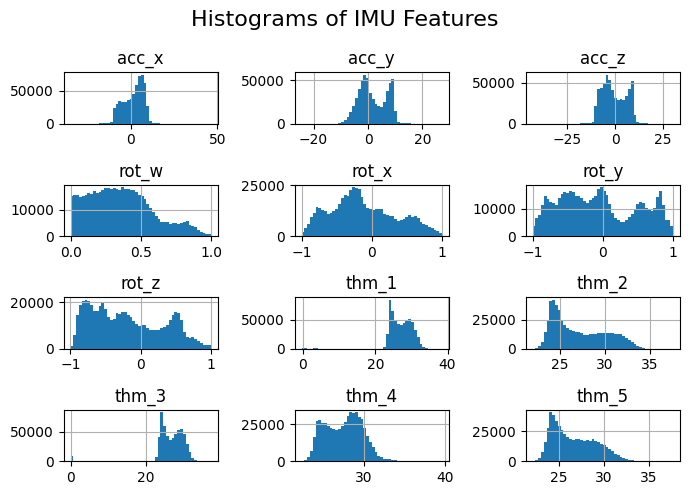

In [19]:
df[imu_columns].hist(bins=50, figsize=(7, 5), grid=True)
plt.suptitle("Histograms of IMU Features", fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[imu_columns]))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)

for i, col in enumerate(imu_columns):
    print(f"{col}: {outlier_counts[i]} z-score outliers")

acc_x: 663 z-score outliers
acc_y: 118 z-score outliers
acc_z: 167 z-score outliers
rot_w: 0 z-score outliers
rot_x: 0 z-score outliers
rot_y: 0 z-score outliers
rot_z: 0 z-score outliers
thm_1: 0 z-score outliers
thm_2: 0 z-score outliers
thm_3: 0 z-score outliers
thm_4: 0 z-score outliers
thm_5: 0 z-score outliers


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:2893: RuntimeWarning: invalid value encountered in less_equal
  zero = std <= xp.abs(eps * mn)
/tmp/ipykernel_35/1479665103.py:4: RuntimeWarning: invalid value encountered in greater
  outlier_mask = (z_scores > 3)


*Quite a lot of outliers, we need to do some pre processing!*

# **Removing Outliers**

In [21]:
def remove_iqr_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

train_df_clean = remove_iqr_outliers(df, imu_columns)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/co

In [22]:
df = train_df_clean

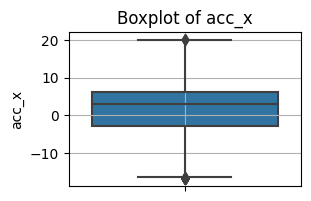

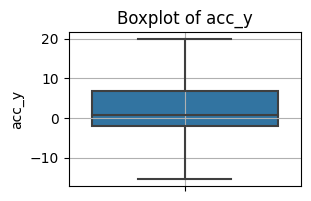

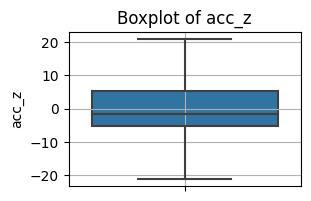

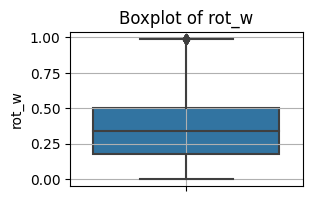

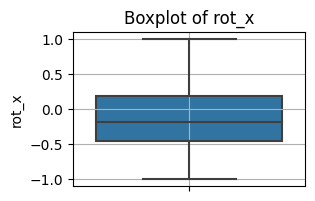

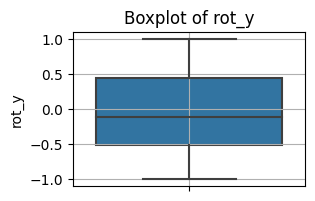

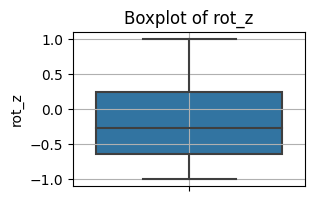

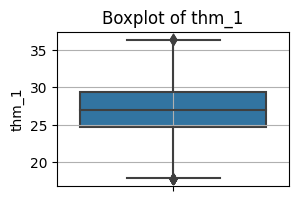

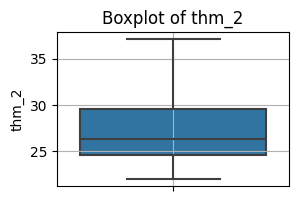

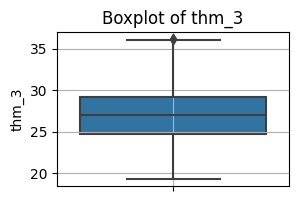

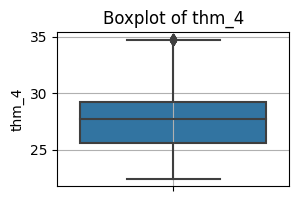

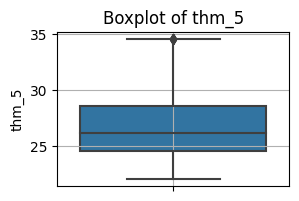

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

imu_columns = ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

for col in imu_columns:
    plt.figure(figsize=(3, 2))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

In [24]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[imu_columns]))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)

for i, col in enumerate(imu_columns):
    print(f"{col}: {outlier_counts[i]} z-score outliers")

acc_x: 221 z-score outliers
acc_y: 67 z-score outliers
acc_z: 87 z-score outliers
rot_w: 0 z-score outliers
rot_x: 0 z-score outliers
rot_y: 0 z-score outliers
rot_z: 0 z-score outliers
thm_1: 296 z-score outliers
thm_2: 29 z-score outliers
thm_3: 149 z-score outliers
thm_4: 244 z-score outliers
thm_5: 326 z-score outliers


In [25]:
from sklearn.ensemble import IsolationForest

def isolation_forest_outlier_removal(df, cols):
    iso = IsolationForest(contamination=0.01, random_state=42)
    preds = iso.fit_predict(df[cols])
    return df[preds == 1]

train_df_clean = isolation_forest_outlier_removal(df, imu_columns)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [26]:
df = train_df_clean

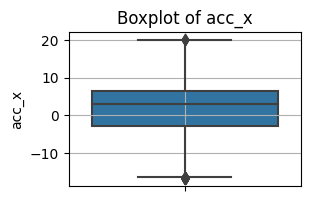

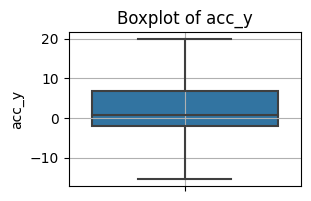

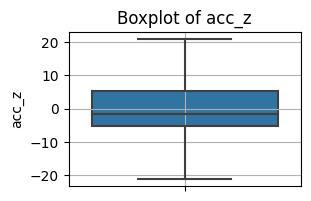

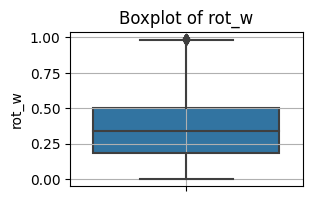

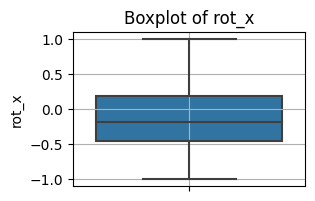

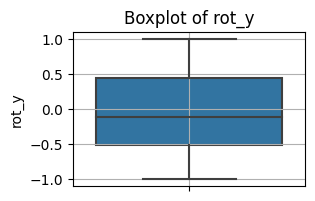

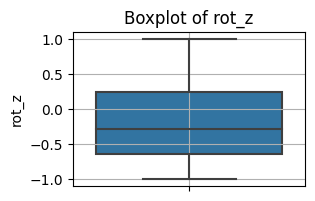

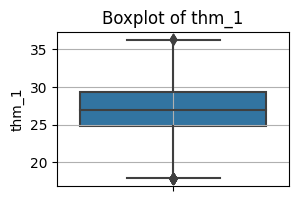

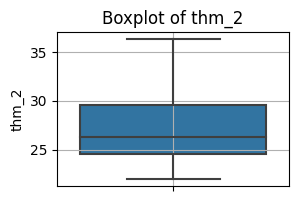

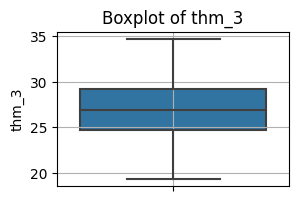

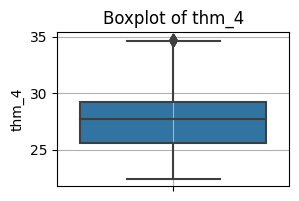

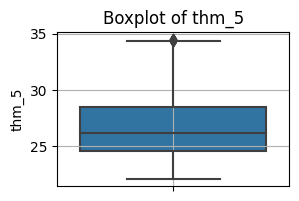

acc_x: 224 z-score outliers
acc_y: 66 z-score outliers
acc_z: 82 z-score outliers
rot_w: 0 z-score outliers
rot_x: 0 z-score outliers
rot_y: 0 z-score outliers
rot_z: 0 z-score outliers
thm_1: 220 z-score outliers
thm_2: 3 z-score outliers
thm_3: 91 z-score outliers
thm_4: 274 z-score outliers
thm_5: 208 z-score outliers


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

imu_columns = ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

for col in imu_columns:
    plt.figure(figsize=(3, 2))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()


from scipy.stats import zscore

z_scores = np.abs(zscore(df[imu_columns]))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)

for i, col in enumerate(imu_columns):
    print(f"{col}: {outlier_counts[i]} z-score outliers")

In [28]:
# Build sequences
sequence_ids = df['sequence_id'].unique()
sequences = df.groupby('sequence_id')

X = []
seq_lengths = []

print("Building sequences...")
for i, (seq_id, seq) in enumerate(sequences):
    if i % 500 == 0:
        print(f"Processing sequence {i}...")
    processed = preprocess_sequence(seq, feature_cols)
    X.append(processed)
    seq_lengths.append(processed.shape[0])

max_len_perentile = 90

# Report sequence length stats
minlen = min(seq_lengths)
avglen = int(np.mean(seq_lengths))
pad_len_to_use = int(np.percentile(seq_lengths, max_len_perentile))  
print(f"Sequence length stats - Min: {minlen}, Avg: {avglen}, {max_len_perentile}th percentile: {pad_len_to_use}")
print(f"Padding / truncating all sequences to fixed length {pad_len_to_use}...")

np.save("sequence_maxlen.npy", pad_len_to_use)  # Save for inference

# Pad/truncate to fixed length
X = pad_sequences(X, maxlen=pad_len_to_use, dtype='float32', padding='post', truncating='post')

Building sequences...
Processing sequence 0...
Processing sequence 500...
Processing sequence 1000...
Processing sequence 1500...
Processing sequence 2000...
Processing sequence 2500...
Processing sequence 3000...
Processing sequence 3500...
Processing sequence 4000...
Processing sequence 4500...
Processing sequence 5000...
Processing sequence 5500...
Processing sequence 6000...
Processing sequence 6500...
Processing sequence 7000...
Sequence length stats - Min: 1, Avg: 69, 90th percentile: 102
Padding / truncating all sequences to fixed length 102...


In [29]:
X

array([[[ 0.40116167,  0.76098865, -0.9591664 , ...,  0.781494  ,
         -2.1221666 ,  0.4057976 ],
        [ 0.60202754,  0.76098865, -1.0586383 , ...,  0.97255456,
         -1.8663766 ,  0.5157104 ],
        [-0.32550013,  0.4946619 , -0.06729072, ...,  1.2112826 ,
         -1.3850366 ,  0.6577677 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.5883323 , -1.705892  ,  1.2497141 , ..., -1.4861993 ,
         -1.8016    , -1.1360956 ],
        [-0.7295065 , -1.705892  ,  1.2656118 , ..., -1.4793863 ,
         -1.6849992 , -1.2073789 ],
        [-0.6571095 , -1.6938504 ,  1.2656118 , ..., -1.4877572 ,
         -1.6447046 , -1.1360956 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [30]:
# Use groupby to get the first gesture per sequence (already integer-encoded)
y = df.groupby('sequence_id')['gesture'].first().values

print("Integer labels:", y[:4])

# Convert to one-hot vectors
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

print("After one-hot encoding:", y[:4])

Integer labels: [ 1  6  1 17]
After one-hot encoding: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [32]:
%%time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

# Build 1D CNN model

model = Sequential([
    # Block 1 
    Conv1D(filters=512, kernel_size=7, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Block 2 
    Conv1D(filters=768, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Block 3
    Conv1D(filters=1024, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    
    # Block 4
    Conv1D(filters=1536, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    
    # Block 5
    Conv1D(filters=2048, kernel_size=3, activation='relu'),
    BatchNormalization(),
    GlobalMaxPooling1D(),  # Alternative to MaxPooling1D + Flatten
    Dropout(0.5),
    
    # Larger Dense layers
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.3),
    
    # Output
    Dense(num_classes, activation='softmax')
])

# Compile model with categorical crossentropy loss (for one-hot labels)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Define early stopping to prevent overfitting and restore best model
# early_stopping = EarlyStopping(
#     monitor='val_loss',           
#     patience=10,
#     restore_best_weights=False,
#     verbose=1
# )

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',      
    factor=0.6,                 
    patience=4,                  
    min_lr=1e-7,                 
    verbose=1
)

# Train model using explicitly split validation set (80/20 held out)
print("Training model...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)

model.save("gesture_cnn_model.h5")
print("Training complete.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753155758.858711      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753155758.859331      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 96, 512)             │          43,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 96, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 48, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 44, 768)             │       1,966,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 768)             │           3,072 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 22, 768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 768)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 20, 1024)            │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 8, 1536)             │       4,720,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 1536)             │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 4, 1536)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 1536)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 2, 2048)             │       9,439,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2048)             │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 2048)                │              

 Total params: 25,382,162 (96.83 MB)

 Trainable params: 25,370,386 (96.78 MB)

 Non-trainable params: 11,776 (46.00 KB)

Training model...
Epoch 1/50


I0000 00:00:1753155767.821383     101 service.cc:148] XLA service 0x7f69fc0247a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753155767.822162     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753155767.822178     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753155768.579689     101 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-22 03:42:54.338956: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=0} for conv (f32[512,768,1,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,64,1,48]{3,2,1,0}, f32[768,64,1,44]{3,2,1,0}), window={size=1x44}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wa

 2/94 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.0352 - loss: 4.9941  

I0000 00:00:1753155781.414653     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 184ms/step - accuracy: 0.1025 - loss: 3.4607 - val_accuracy: 0.0608 - val_loss: 2.8698 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.1866 - loss: 2.4771 - val_accuracy: 0.0701 - val_loss: 2.7292 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2204 - loss: 2.3034 - val_accuracy: 0.1657 - val_loss: 2.6984 - learning_rate: 0.0010
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2426 - loss: 2.1944 - val_accuracy: 0.1757 - val_loss: 2.3599 - learning_rate: 0.0010
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.2651 - loss: 2.0926 - val_accuracy: 0.2592 - val_loss: 2.1234 - learning_rate: 0.0010
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.2667 - loss: 2.0356 - val_accuracy: 0.2745 - val_loss: 2.2168 - learning_rate: 0.0010
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3183 - loss: 1.9653 - val_accuracy: 0.

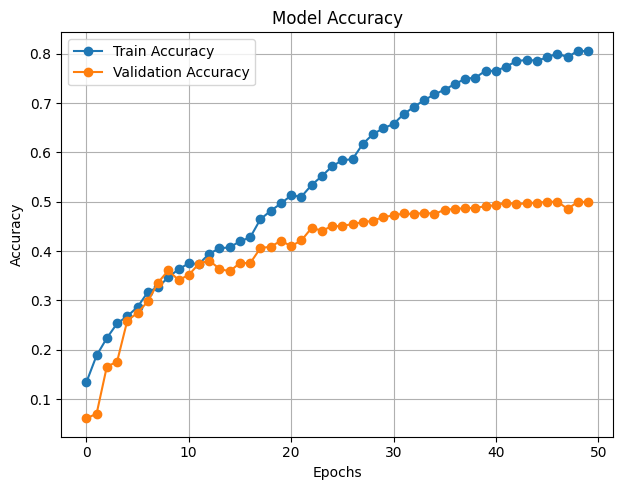

In [40]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss', marker='o')
# plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
# plt.title('Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
model = load_model("gesture_cnn_model.h5")
maxlen = int(np.load("sequence_maxlen.npy"))  # ensure consistent shape
gesture_classes = np.load("gesture_classes.npy", allow_pickle=True)

def predict(sequence: pl.DataFrame, demographics: pl.DataFrame) -> str:
    df_seq = sequence.to_pandas()
    processed = preprocess_sequence(df_seq, feature_cols)
    padded = pad_sequences([processed], maxlen=maxlen, dtype='float32', padding='post', truncating='post')
    prediction = model.predict(padded, verbose=0)
    predicted_index = np.argmax(prediction, axis=1)[0]
    return gesture_classes[predicted_index]

# Launch inference server
inference_server = kaggle_evaluation.cmi_inference_server.CMIInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(
        data_paths=(
            '/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv',
            '/kaggle/input/cmi-detect-behavior-with-sensor-data/test_demographics.csv',
        )
    )

In [43]:
if not os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    print("\nRunning manual test...")
    test_df = pd.read_csv('/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv')
    sample_seq_id = test_df['sequence_id'].unique()[0]
    test_seq = test_df[test_df['sequence_id'] == sample_seq_id]
    prediction = predict(pl.DataFrame(test_seq), None)
    print(f"Manual prediction result for sequence_id {sample_seq_id}: {prediction}")


Running manual test...
Manual prediction result for sequence_id SEQ_000001: Eyelash - pull hair
